# Logistic Regression

### 1. Problem Type
- **Linear regression** predicts a continuous value (e.g., house price).  
- **Logistic regression** predicts a *probability* that something belongs to a class (bounded between 0 and 1).  
- The final prediction is usually made by applying a **threshold** (e.g., ≥ 0.5 → class 1, < 0.5 → class 0).  


### 2. Classification Types
- We are not predicting here exact numerical value like 76.8% marks
- Instaed, Identifying the Class using the input features

- **Binary Classification**: Binomial Logistic Regression
    - used when the dependent variable has only two possible categories.
    - Exam - Pass (1) or Fail (0)
    - Loan Default - No Default (1) or Default (1)
    - Credit card transaction - Fraudulent (1) or Valid (0)
    - Disease diagnosis - Yes (1) or No (0)
    - Input feature: number of study hours, professor experience, coaching class
- **Multi-Class Classification**: Multinomial Logistic Regression
    - used when the dependent variable has three or more possible categories that are not ordered
    - Which animal is in the image - cat, dog, sheep
    - What sentiment does the sentence carry - happy, neutral, sad, 
    - What skin condition does a patient have - multiple conditions 
    - Email classification - Work, Personal, Spam, Promotions
- **Multi-Class Classification**: Ordinal Logistic Regression
    - applies when the dependent variable has three or more categories with a natural order or ranking. It takes the order of the categories into account when modeling
    - What is the - low, medium, high
    - What sentiment does the sentence carry - happy, neutral, sad 


## 3. Formula
- Logistic regression uses the **sigmoid (logistic) function**:

p =        1  / (1 + exp(-(b0 + b1x1 + b2x2 + ... + bn*xn)))

Where:  
- p = probability of belonging to class 1  
- b0 = intercept  
- b1...bn = coefficients (weights for features)  
- x1...xn = input features  

This ensures the output is always between 0 and 1.  
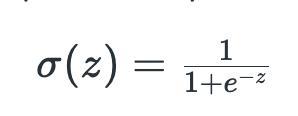

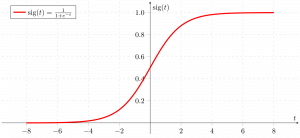


## 4. Decisioning Boundary
- Digital systems operate on numbers, not labels
- To convert numbers into categorical variables, we can 
    - Take a **rule based** approach IF ... THEN ...
    - Use a **statistical probability** approach; score  → probability
- But linear regression does not give us probability

**Decision Boundary - Rule Based**
- If marks ≥ 50 and <75 → average
- If marks > 75 → distinction
- (Threshold can be adjusted depending on the problem, like fraud detection where 0.3 might be used).

**Decision Boundary - Numeric Variables**
- If 𝑝 ≥ 0.5 → predict class 1
- If 𝑝 < 0.5 → predict class 0
- (Threshold can be adjusted depending on the problem, like fraud detection where 0.3 might be used).

## 5. Constraining the output as probability

- **key idea in logistic regression** is that we don’t want predictions to be just any real number (like in linear regression). Instead, **we want predictions to represent a probability** — which means values **must lie strictly between 0 and 1**.

**Why do we need to constrain**
- In linear regression the model is y_pred = b0 + b1*x1 + b2*x2 + ... + bn*xn
- This can give any value from -∞ to +∞
- So we can’t directly use linear regression for classification.

**How logistic regression solves this**
- We apply a **link (the logistic / sigmoid) function** that squashes any real number into 0-1 range

    p = 1 / (1 + exp(-z))

    - where z = b0 + b1*x1 + b2*x2 + ... + bn*xn
    - If z → +∞, then exp(-z) → 0, so p → 1
    - If z → -∞, then exp(-z) → ∞, so p → 0
    - If z = 0, then p = 0.5

- The linear equation (z) captures the relationship between inputs and outcome.
- The sigmoid function ensures the model’s output is always interpretable as a probability.

- It's still regression, but uses sigmoid or logistic to constrain the output
- Now we have output probabilities, but where are the predicted labels?
    - Inputs  → Logistic Regression  → Probabilities  → Cutoff  → Class Label Predictions

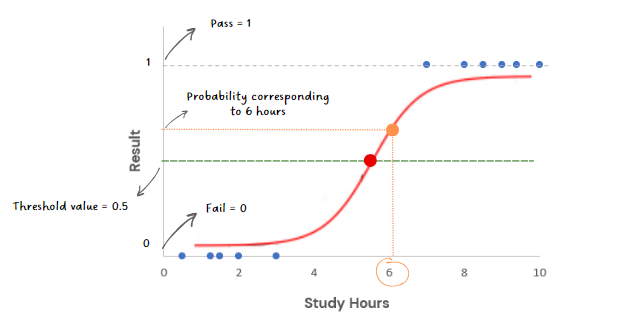

**Probability**
- p is in the range of 0-1
- p → 1 means that it is very likely that the data point belongs to the **class of interest (pass)**
- p → 0 means that it is very likely that the data point belongs to the **class of interest (fail)**
- a typical cut-off value is 0.5, but it may vary based on the use case and model performance
- note that the threshold affects the predicted labels



## Terminologies involved in Logistic Regression
Here are some common terms involved in logistic regression:
- **Independent Variables**: These are the input features or predictor variables used to make predictions about the dependent variable.
- **Dependent Variable**: This is the target variable that we aim to predict. In logistic regression, the dependent variable is categorical.
- **Logistic Function**: This function transforms the independent variables into a probability between 0 and 1 which represents the likelihood that the dependent variable is either 0 or 1.
- **Odds**: This is the ratio of the probability of an event happening to the probability of it not happening. It differs from probability because probability is the ratio of occurrences to total possibilities.
- **Log-Odds (Logit)**: The natural logarithm of the odds. In logistic regression, the log-odds are modeled as a linear combination of the independent variables and the intercept.
- **Coefficient**: These are the parameters estimated by the logistic regression model which shows how strongly the independent variables affect the dependent variable.
- **Intercept**: The constant term in the logistic regression model which represents the log-odds when all independent variables are equal to zero.
- **Maximum Likelihood Estimation (MLE)**: This method is used to estimate the coefficients of the logistic regression model by maximizing the likelihood of observing the given data.

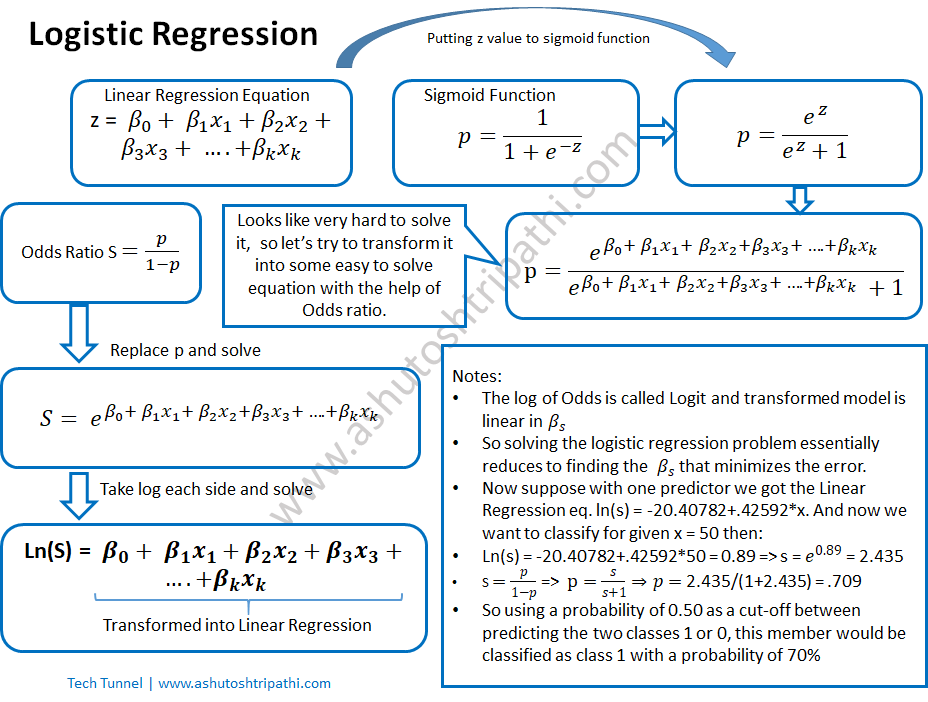

## Impact of changing cutoff

- a. **Default cutoff (0.5)**
    - Balanced assumption: both classes are equally important.
    - Works well when:
        - Classes are balanced (50/50 or close).
        - Cost of misclassification is roughly the same.

- b. **Lower cutoff (e.g., 0.3)**
    - Easier for a case to be classified as class 1.
    - Impact:
        - Higher sensitivity (recall) → catches more true positives.
        - Lower specificity → more false positives.
    - Example: medical screening → better to catch more potential patients even if some are false alarms.

- c. **Higher cutoff (e.g., 0.7)**
    - Harder for a case to be classified as class 1.
    - Impact:
        - Higher specificity → fewer false positives.
        - Lower sensitivity (recall) → may miss true positives.
    - Example: fraud detection → you only want to flag strong cases of fraud.

- **Trade-offs**
    - Cutoff = 0.5 → balanced error rate.
    - Cutoff ↓ (low) → maximize recall (catch more positives).
    - Cutoff ↑ (high) → maximize precision (fewer false alarms).

This is exactly why we use **ROC curves** and **Precision-Recall** curves:
- They show how model performance changes across all possible cutoffs.
- You can then pick the cutoff that fits business needs.

## how logistic regression (or classifiers in general) handle multi-class classification 
when there are more than 2 classes

**One-vs-Rest (OvR)**
- Also called One-vs-All (OvA).
- Idea: Break a multi-class problem into multiple binary problems.
- How it works:
    - Suppose you have 3 classes: A, B, C.
    - Build 3 classifiers:
        - Classifier 1: A vs (B + C)
        - Classifier 2: B vs (A + C)
        - Classifier 3: C vs (A + B)
- For a new data point:
    - Each classifier gives a probability (e.g., p(A), p(B), p(C)).
    - Pick the class with the highest probability.
- ✅ Pros:
    - Simple, works with any binary classifier.
    - Easy to implement.
- ❌ Cons:
    - Probabilities may not be well-calibrated across classifiers.
    - Can be inefficient if number of classes is large.

- Formula, 
- For each class j,

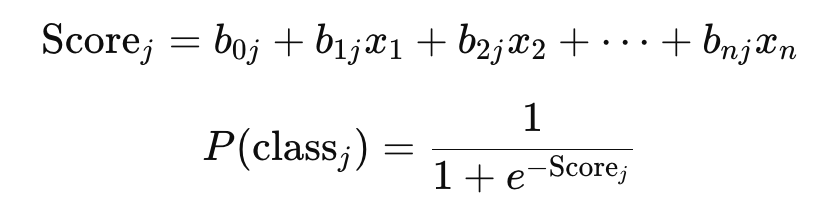

- You train k separate binary classifiers (one for each class vs all others).
- Final prediction: the class with the highest probability.



**Softmax (Multinomial Logistic Regression)**
    - Instead of training multiple binary models, train a single model that handles all classes simultaneously.
    - Uses the softmax function (a generalization of the sigmoid).

Formula:

For class j out of k classes:

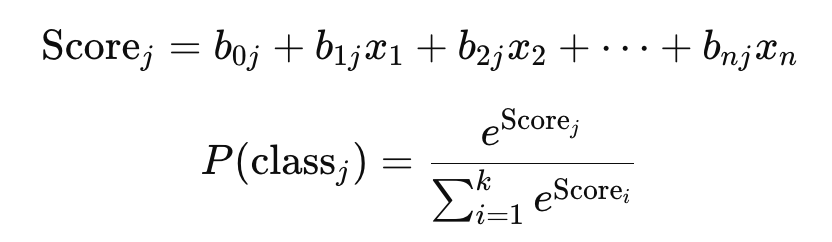

- A single model gives probabilities for all classes.
- All probabilities sum to 1.
- Final prediction: the class with the highest probability.

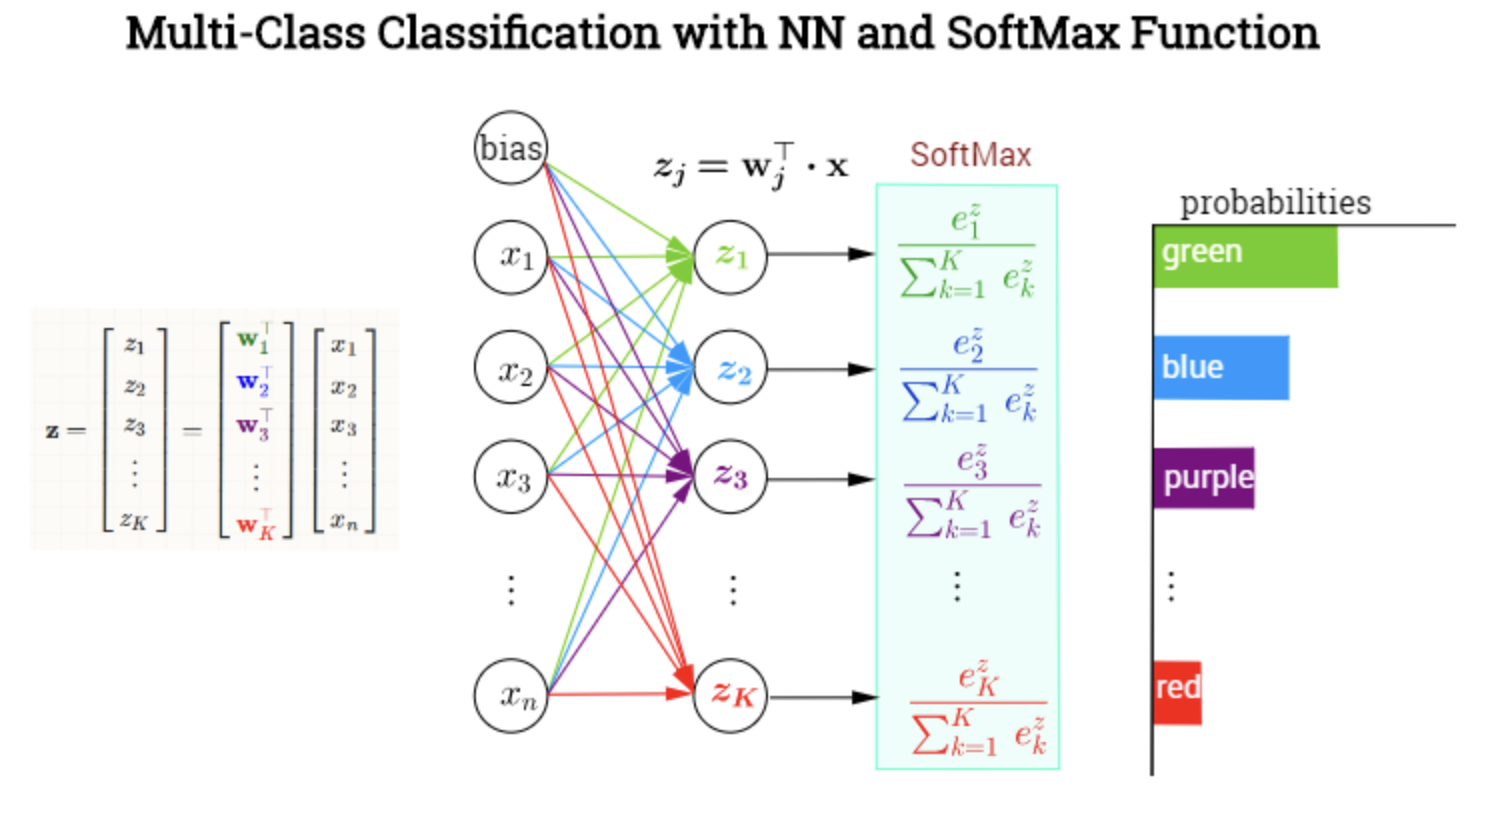

# One-vs-Rest (OvR) vs Softmax

| Aspect                  | One-vs-Rest (OvR)                                   | Softmax (Multinomial Logistic Regression) |
|--------------------------|----------------------------------------------------|-------------------------------------------|
| **Approach**             | Trains one binary classifier per class             | Trains a single model for all classes      |
| **Formula (probability)**| P(class_j) = 1 / (1 + exp(-Score_j))               | P(class_j) = exp(Score_j) / Σ(exp(Score_i))|
| **Score_j**              | b0_j + b1_j*x1 + b2_j*x2 + ... + bn_j*xn           | Same as OvR (linear score per class)       |
| **Probability Sum**      | Each model independent → may not sum to 1          | Probabilities always sum to 1              |
| **Prediction**           | Pick the class with the highest probability        | Pick the class with the highest probability|
| **When to Use**          | Simple, works with any binary classifier           | More natural for multi-class problems      |
| **Efficiency**           | Needs k models for k classes                       | Single model handles all classes           |
| **Example**              | 3 models: (A vs rest), (B vs rest), (C vs rest)    | 1 model: directly gives P(A), P(B), P(C)   |


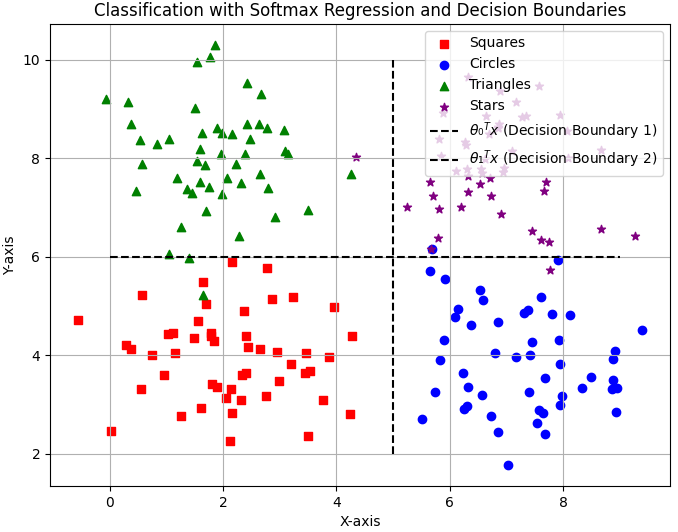

## Loss in Logistic Regression
In linear regression, we trained the model by minimising the mean squared error. But we do not have any such metric here. We just have the true class labels of data points. How can we try to minimise the misclassifications using the true class labels and predicted probabilities?  

For this, we need a measure that improves when the classification is correct (predicted class label matches the true one) and confident (higher probability of belonging to the predicted label). Similarly, the measure should become worse when the classification is confidently wrong. 

# Loss Functions: Linear Regression vs Logistic Regression

- Linear regression cares about minimizing distance between actual and predicted values.
- Logistic regression cares about maximizing the likelihood of correct classification (probability).


| Aspect                  | Linear Regression                                | Logistic Regression                               |
|--------------------------|-------------------------------------------------|--------------------------------------------------|
| **Prediction type**      | Continuous value (ŷ can be any real number)     | Probability between 0 and 1                      |
| **Typical output**       | ŷ = b0 + b1x1 + b2x2 + ... + bnxn               | p = 1 / (1 + exp(-(b0 + b1x1 + ... + bnxn)))     |
| **Error measurement**    | Difference between actual and predicted values   | Likelihood of predicting correct class           |
| **Loss function**        | Mean Squared Error (MSE):                        | Log Loss (Cross-Entropy):                        |
|                          | L = (1/N) Σ (y - ŷ)²                           | L = -(1/N) Σ [ y*log(p) + (1-y)*log(1-p) ]       |
| **Why this loss?**       | Squared error works well for continuous targets  | Squared error fails for classification → instead use log-likelihood |
| **Intuition**            | Penalizes larger errors more heavily             | Penalizes confident wrong predictions heavily     |
| **Optimization**         | Minimize squared differences                     | Maximize likelihood (or equivalently minimize log loss) |


## Loss Function

**What logistic regression predicts**
- Logistic regression doesn’t predict “yes” or “no” directly.
- Instead, it predicts a probability between 0 and 1 (e.g., “there’s a 0.85 chance this student passes”).

**What is Likelihood**

For one data point: 
- If the true label is 1, the model’s probability for class 1 should be high (close to 1).
    - Example: if y=1 and model says p=0.85 → good!
- If the true label is 0, the model’s probability for class 1 should be low (close to 0).
    - Example: if y=0 and model says p=0.15 → good!
- We need a metric that is high when the actual value matches predicted value (y_act = y_prep) and low when it does not
- The expression p^y * (1 - p)^(1 - y) does exactly the same
- 👉 Likelihood answers: “How probable is it that my model gave all these predictions correctly?”

**Why Log-Likelihood**
- Multiplying many small numbers → product becomes extremely tiny.
- Logs turn multiplication into addition. Much easier to work with.
- 👉 Higher log-likelihood = better model.
- 👉 Logistic regression training = maximize log-likelihood.

**Why Log Loss**
- For ML, we need to make a Loss Function, so that we can optimize the model to minimize the loss. 
- Machine learning libraries don’t usually report the raw log-likelihood.
- Instead, they take the negative (so we minimize instead of maximize) and divide by N (to normalize per sample).
- Lower log-loss = better model.
- This is just the “average penalty” the model gets per data point.

**Likelihood (per datapoint)**
Likelihood = p^y * (1 - p)^(1 - y)

- where:
    - If y=1 → Likelihood = p
    - If y=0 → Likelihood = (1 - p)

- For N independent data points, total likelihood = product of individual likelihoods.
- Log-likelihood = sum of log of individual likelihoods.

**Log loss (cross-entropy) — per datapoint**
Loss = - [ y * log(p) + (1 - y) * log(1 - p) ]

where: y is the true label (0 or 1), p is the predicted probability for class 1.

- Lower loss = better. 
- If y=1 and p is close to 1 → loss near 0. If y=1 but p small → large loss.

**Relationship**
- **Per-point Likelihood (Lᵢ):**  Lᵢ = p^y * (1 - p)^(1 - y)  
    - → We want to **maximize Likelihood** for each data point

- **Total Likelihood:**  L = ∏ Lᵢ  (product over all data points)

- **Log-Likelihood:**  ln(L) = Σ ln(Lᵢ)  
    - (we take logs so products turn into sums, easier to compute)

- **Per-point Log Loss (lossᵢ):**  
  lossᵢ = - [ y * ln(p) + (1 - y) * ln(1 - p) ]  = - ln(Lᵢ)

- **Sum of Log Losses:**  Σ lossᵢ = - Σ ln(Lᵢ) = - Log-Likelihood

- **Mean of Log Losses:** 1/n * Σ lossᵢ = -1/n Σ ln(Lᵢ) = -(1/n) * Log-Likelihood
    - This is called **Log Loss** or **binary cross-entropy**
    - Complete process is called **Maximum Likelihood Expression (MLE)** 

**Why divide by N?**
- Without 1/N, the loss just grows with dataset size.
- With 1/N, the loss is normalized per data point, making it comparable across datasets of different sizes.
- In optimization, multiplying by 1/N does not change the location of the minimum, but it makes the scale consistent.
👉 
- Logistic regression training = **maximize Log-Likelihood**  
- which is the same as **minimizing Sum of Negative Log Losses**.
- In machine learning practice, we report log-loss as the mean NLL (with 1/N)
- That is why logistic regression fits parameters by minimizing log loss.

**Logistic Regression: Per-Point Loss and Likelihood for Sample Points**


| Point | y (true) | p (pred prob) | Likelihood (Lᵢ) | ln(Lᵢ)   | Log Loss (lossᵢ) |
|-------|----------|---------------|-----------------|----------|------------------|
| A     | 1        | 0.20          | 0.20            | -1.6094  | 1.6094           |
| B     | 1        | 0.85          | 0.85            | -0.1625  | 0.1625           |
| C     | 0        | 0.15          | 0.85            | -0.1625  | 0.1625           |
| D     | 0        | 0.75          | 0.25            | -1.3863  | 1.3863           |


**Totals (for 4 data points)**

- **Total Likelihood (Product):**  
  L = 0.20 × 0.85 × 0.85 × 0.25 = **0.036125**

- **Log-Likelihood (Sum of logs):**  
  ln(L) = -1.6094 + (-0.1625) + (-0.1625) + (-1.3863) = **-3.3207**

- **Negative Log-Likelihood (Sum of losses):**  
  NLL = 1.6094 + 0.1625 + 0.1625 + 1.3863 = **3.3207**

- **Log Loss (Mean of losses):**  
  Log Loss = NLL / N = 3.3207 / 4 = **0.8302**

**Intuition**
- Likelihood: “How much does the model agree with the data?”
- Log-Likelihood: “Let’s make that manageable by using logs.”
- Negative Log-Likelihood (NLL): “Flip the sign so lower is better.”
- Log-Loss: “Take the average penalty per sample (so we can compare across datasets).”
- 👉 Logistic regression = finding parameters (b0, b1, …) that make log-loss as small as possible (or equivalently, log-likelihood as large as possible).

# Logistic Regression Flow
```yaml
Input (x features)  
   ↓  

Score (linear)  
   z = b0 + b1*x1 + b2*x2 + ... + bn*xn  
   ↓  

Probability (sigmoid)  
   p = 1 / (1 + exp(-z))  
   ↓  

Likelihood (per point)  
   Lᵢ = p^y * (1 - p)^(1 - y)  
   ↓  

Log-Likelihood (dataset)  
   ln(L) = Σ ln(Lᵢ)  
   ↓  
   
Log-Loss (mean negative log-likelihood)  
   Log Loss = - (1/N) * Σ ln(Lᵢ)
```

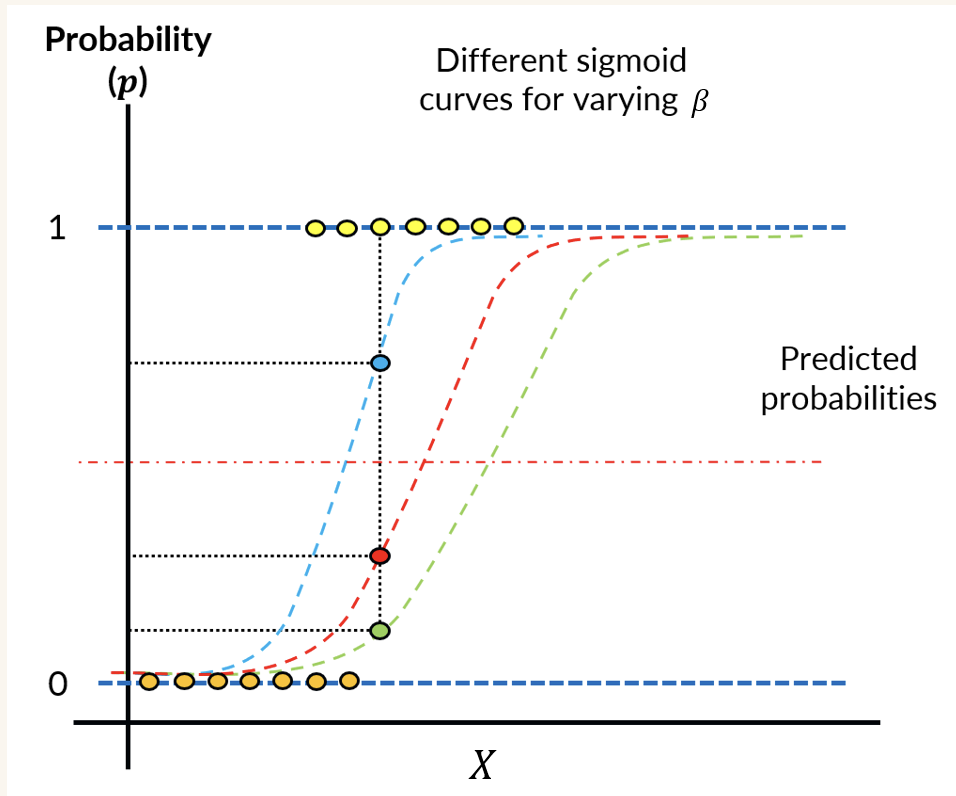

## What is Accuracy?

- Accuracy = the fraction of predictions the model got correct.
- In other words:

Accuracy = Number of correct predictions / Total number of predictions

- *Why Accuracy Alone Fails*
- Imagine 100 patients:
    - 95 are healthy, 5 are terminally ill.
    - A dumb model predicts all 100 as healthy.
    - Correct = 95 (TN), Wrong = 5 (FN)
- Accuracy = 95% 🤩 → Looks amazing.
- But the model missed all 5 terminally ill patients → catastrophic in healthcare.

## Confusion Matrix View

- For binary classification (2 classes: positive/negative), predictions fall into 4 buckets:

| **Actual \ Predicted** | **Predicted Positive (ŷ=1)** | **Predicted Negative (ŷ=0)** |
|-------------------------|------------------------------|-------------------------------|
| **Actual Positive (y=1)** | True Positive (TP)            | False Negative (FN)            |
| **Actual Negative (y=0)** | False Positive (FP)           | True Negative (TN)             |

Accuracy formula in terms of these:

Accuracy = (TP + TN)/ (TP + TN + FP + FN)
         = (TP + TN)/ Total Predictions

**Example: Predicting if a Patient is Terminally Ill**
- Suppose we build a model that predicts whether a patient is terminally ill (Yes = 1) or not terminally ill (No = 0).

# Confusion Matrix Example: Terminally Ill Patient Prediction

| **Actual \ Predicted**   | **Predicted: Ill (1)** | **Predicted: Healthy (0)** |
|---------------------------|------------------------|-----------------------------|
| **Actual: Ill (1)**       | **True Positive (TP)** <br> Patient is ill, model predicts ill ✅ | **False Negative (FN)** <br> Patient is ill, model predicts healthy ❌ |
| **Actual: Healthy (0)**   | **False Positive (FP)** <br> Patient is healthy, model predicts ill ❌ | **True Negative (TN)** <br> Patient is healthy, model predicts healthy ✅ |

## Interpretation

- **True Positive (TP):** Correctly identifies a terminally ill patient → patient gets timely treatment.  
- **True Negative (TN):** Correctly identifies a healthy patient → no unnecessary worry.  
- **False Positive (FP):** Healthy patient wrongly flagged as ill → causes stress, may lead to unnecessary treatment.  
- **False Negative (FN):** Ill patient wrongly flagged as healthy → worst case, no treatment, disease progresses.

## Why FP and FN Matter
- **False Positives (FP):** Psychological, financial, and ethical cost.  
- **False Negatives (FN):** Missed critical diagnosis → can cost lives.  

👉 In this scenario, **FN is far more dangerous** than FP, so the model should be tuned to minimize FN (higher **recall/sensitivity**).

- *Case 1: False Positive (FP)*
    - Definition: Model says patient is terminally ill, but in reality they are healthy.
    - Impact:
        - Causes unnecessary stress and trauma for patient & family.
        - May trigger unneeded treatments (expensive, harmful side effects).
        - Ethical implications: risk of misdiagnosis → potential lawsuits.
    - 👉 FP = "healthy patient mistakenly predicted as terminally ill."

- *Case 2: False Negative (FN)*
    - Definition: Model says patient is not terminally ill, but in reality they are terminally ill.
    - Impact:
        - The patient doesn’t get timely treatment.
        - Disease progresses unchecked → loss of chance to prolong life.
        - Missed opportunity for palliative care and preparing family.
    - 👉 FN = "sick patient mistakenly predicted as healthy."

**What’s More Important?**
- In medical screening, False Negatives (FN) are often far worse → because missing a real patient means no treatment.
- In other domains (like spam detection), False Positives (FP) may matter more (blocking an important email is worse than letting a spam through).

**Key Insight**
- Accuracy ≠ enough.
- We must measure FP and FN separately → using metrics like Precision, Recall, F1-score, Sensitivity, Specificity.
- The choice of which error to minimize (FP vs FN) depends on business/ethical context.

---

## Accuracy, Precision, Recall, F1-score, ROC-AUC

**Primary class of interest** (sometimes called the **positive class**, or just “the class of focus”) is the class we care about detecting correctly in a classification problem.

Primary class of interest = the one that represents the important event, outcome, or condition we are trying to identify.

**Examples**
- Medical diagnosis:
    - Positive (class of interest) = “Patient has the disease”
    - Negative = “Patient is healthy”
    - Why? Missing a sick patient (FN) is worse than a false alarm (FP).
- Fraud detection:
    - Positive = “Transaction is fraud”
    - Negative = “Transaction is legitimate”
    - Why? Detecting fraud is the primary goal. Calling a legitimate customera fraud (FP), is worse than missing out a fraud transaction (FN)
- Email spam filter:
    - Positive = “Spam”
    - Negative = “Not spam”
    - Here, the “class of interest” could be spam, since the goal is to catch unwanted messages. Calling a good email a spam (FP), is worse than missing out a spam email (FN)

**Why it matters**
- Many metrics (Precision, Recall, F1) are defined relative to the primary class of interest.
- Precision: Of all predicted positives, how many are truly positive?
- Recall: Of all actual positives, how many did we catch?
- The choice of positive class changes how these metrics are interpreted.

| **Actual \ Predicted**   | **Predicted: Positive (1)**                                         | **Predicted: Negative (0)**                                  |
| ------------------------ | ------------------------------------------------------------------- | ------------------------------------------------------------ |
| **Actual: Positive (1)** | **True Positive (TP)** → Sick patient correctly diagnosed           | **False Negative (FN) Type-II** → Sick patient wrongly told healthy  |
| **Actual: Negative (0)** | **False Positive (FP) Type-I** → Healthy patient wrongly diagnosed as sick | **True Negative (TN)** → Healthy patient correctly diagnosed |



### Accuracy

Accuracy = Number of correct predictions / Total number of predictions

Accuracy= (TP+TN) / (TP + TN + FP + FN)

- Accuracy measures “How often is the model right?” 
- ⚠️ Can be misleading if disease is rare (class imbalance).

### Precision

Precision = Of all predicted positives, how many are truly positive?
- Example, “When the model predicts disease, how often is it correct?”

Precision = TP / (TP + FP)

- High precision = few false alarms.
- Important in cases where treatments are risky/expensive.

### Recall (Sensitivity, True Positive Rate)

- Recall: Of all actual positives, how many did we catch?
- Example, “If a patient has the disease, how often do we catch it?”

Recall = TP / (TP + FN) 

- High recall = few missed cases.
- Critical in medical screening (better to raise false alarms than miss sick patients).

### F1.Score

F1 = Balance between Precision and Recall (harmonic mean)

F1 = 2 * (Precision * Recall) / (Precision + Recall)

- Useful when both FP and FN are costly.
- A single score combining both.

### ROC-AUC (Receiver Operating Characteristic – Area Under Curve)

**ROC curve plots:** : 
- True Positive Rate (Recall) on Y-axis
- False Positive Rate (FPR = FP / (FP + TN)) on X-axis

**AUC = Area Under Curve** = probability that the model ranks a random sick patient higher than a random healthy one.

Interpretation:
- AUC = 0.5 → no better than random guessing.
- AUC = 1.0 → perfect separation.


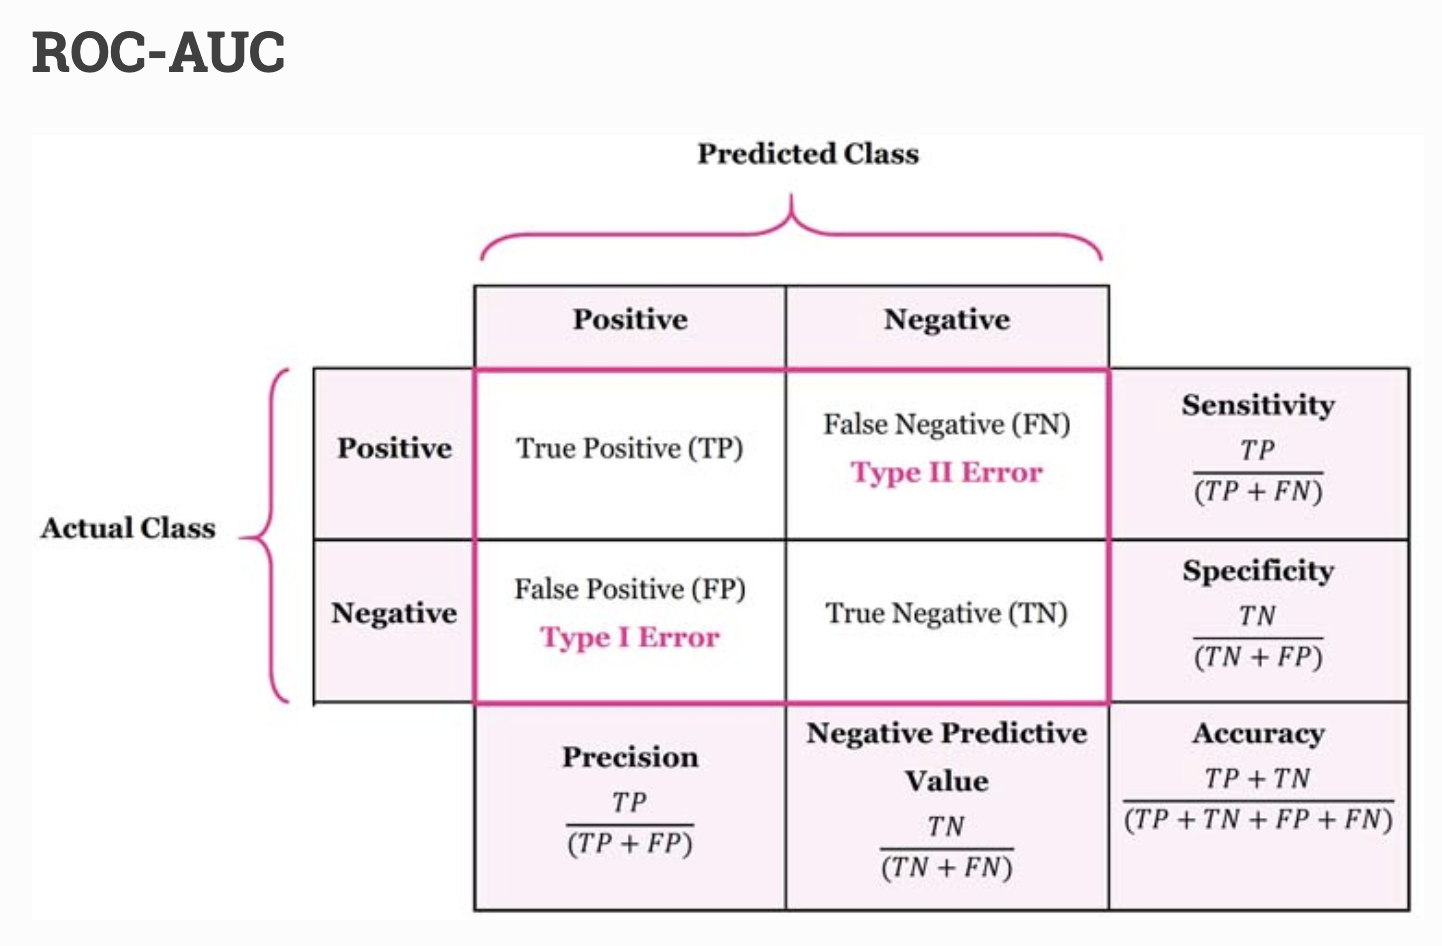

**Interpretation**
- Precision is the number of truly positive values out of the predicted positive values 
- **Positive recall** or **sensitivity** or the **true positive rate** measures how many positives were correctly predicted out of the true positives  
- **Negative recall** or **specificity** or **true negative rate** measures how many negatives were correctly predicted out of the true negatives 
 
In some cases, recall is more important than precision or vice versa. When both recall and precision are important, we use F1 score, which is the harmonic mean of the two. 

---
## Impact of cut off

### Lower Threshold (lenient, cutoff = 0.3)

| **Actual \ Predicted** | **Pred +** | **Pred -** |
|-------------------------|------------|------------|
| **Actual + (20)**       | TP = 18    | FN = 2     |
| **Actual - (80)**       | FP = 20    | TN = 60    |

- Precision drops  = 18 / (18+20) = **0.47**  
- Recall increases = 18 / (18+2) = **0.90**

### Higher Threshold (strict, cutoff = 0.7)

| **Actual \ Predicted** | **Pred +** | **Pred -** |
|-------------------------|------------|------------|
| **Actual + (20)**       | TP = 12    | FN = 8     |
| **Actual - (80)**       | FP = 5     | TN = 75    |

- Precision increases = 12 / (12+5) = **0.71**  
- Recall drops        = 12 / (12+8) = **0.60**

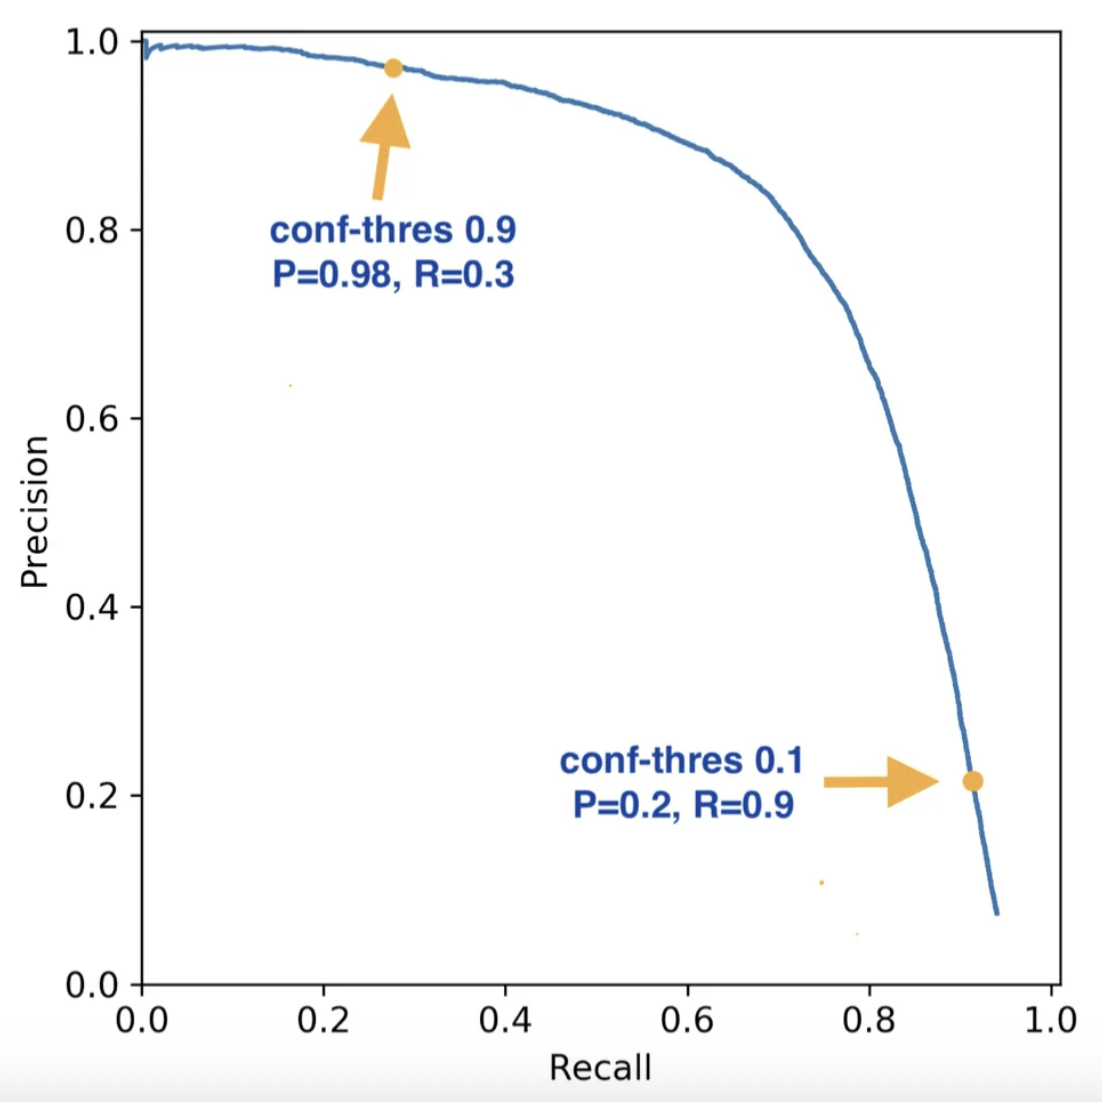


----
## ROC vs AUC

### ROC (Receiver Operating Characteristic curve)

A curve (graph) that shows the trade-off between:
- True Positive Rate (TPR / Recall / Sensitivity) on the Y-axis
- False Positive Rate (FPR = FP / (FP+TN)) on the X-axis
- It’s drawn by calculating TPR and FPR at all possible classification thresholds (0 → 1).

👉 In short: ROC = the curve itself.

### AUC (Area Under the ROC Curve)

- A single number that summarizes the ROC curve.
- It measures the overall ability of the model to separate classes.

AUC = Area under the ROC curve

Values:
- 0.5 → model is as good as random guessing
- 1.0 → perfect classifier
- <0.5 → worse than random (model is flipped)

👉 In short: AUC = the score (area value) summarizing the ROC.

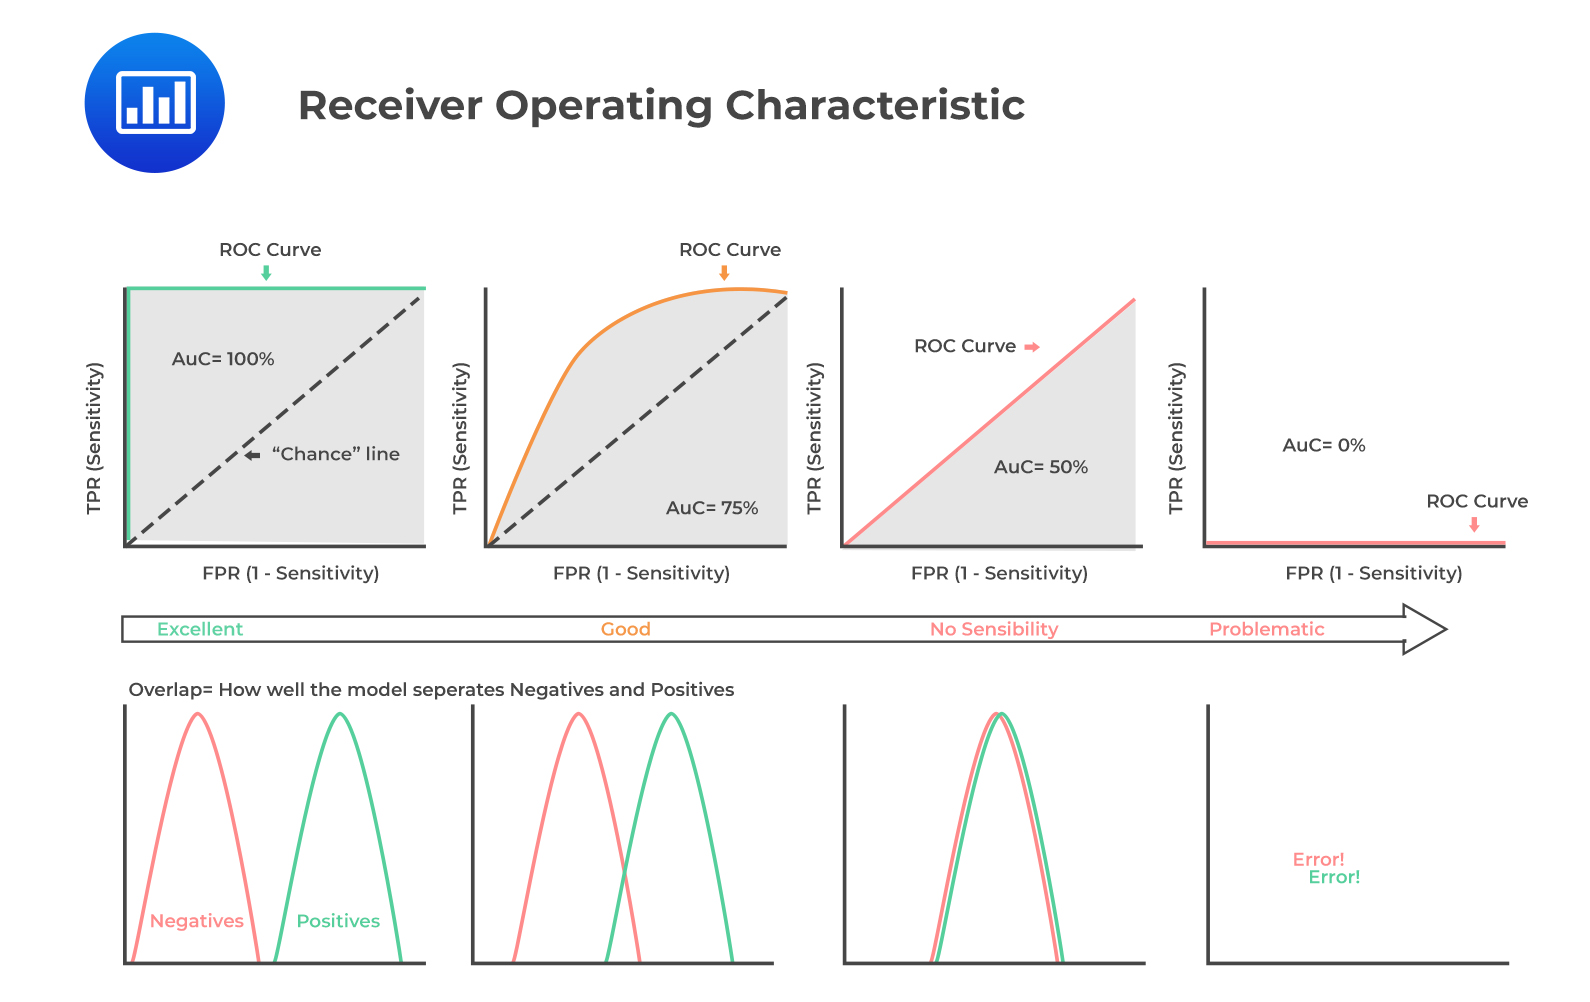

## Multiclass Confusion Matrix

- In binary classification, the confusion matrix is 2×2.
- In multiclass classification (say 3 classes: A, B, C), the confusion matrix becomes a 3×3 table.
- Each row = actual class,
- Each column = predicted class.

### Confusion Matrix (3 classes)

- Example (3-class: Disease Type A, B, C)
- Suppose we test 30 patients, and the model classifies them into Disease A, B, or C.

| **Actual \ Predicted** | **Pred: A** | **Pred: B** | **Pred: C** |
|-------------------------|-------------|-------------|-------------|
| **Actual A**            | 8 (TP for A) | 1 (A→B error) | 1 (A→C error) |
| **Actual B**            | 2 (B→A error) | 7 (TP for B) | 1 (B→C error) |
| **Actual C**            | 0 (C→A error) | 2 (C→B error) | 8 (TP for C) |


**How to Read It**
- Diagonal cells = correct predictions (TP for each class).
- Off-diagonal cells = misclassifications.

**Metrics in Multiclass**
- We calculate Precision, Recall, and F1 for each class separately (one-vs-rest) and then average:

Precision for A = TP_A / (TP_A + FP_A)

Recall for A = TP_A / (TP_A + FN_A)

Similarly for B, C.

Averaging:
- Macro-average = simple mean across classes.
- Weighted-average = mean weighted by class frequencies.

----
## Interpreting Coefficients for Logistic Regression

In logistic regression, we work with probabilities. But it is also convenient to use odds. The odds of an event E occurring are defined as the ratio of the probability of it occurring to the probability of it not occurring,


Equation
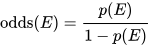
 

From the sigmoid function, we can also say, 

Equation
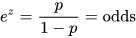
 

In other words, the linear model that we pass to the sigmoid function is the log of these odds, 

 

Equation

 

These log odds are also called the logit, and the logit function transforms the non-linear relationship between p and z (and the coefficients as well) into a linear relationship. The logistic function transforms this linear predictor into a probability p. Having understood how odds, log-odds and the coefficients all relate to each other, we can next understand how to interpret the coefficients.

Simply put, **we can say that the coefficient β represents the change in log-odds for a unit change in x**.  If we take the difference in log-odds of x and x+1 and exponentiate it, we get the odds-ratio, 



Equation
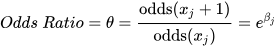
 

This **odds ratio indicates the percentage change in odds for each predictor for a unit increase in the predictor**. Because the scale of predictors can vary and we do not have a clear linear relationship between the coefficients and outputs, we usually report the odds ratio instead of just the raw coefficients. 



**Key Takeaways**
- Coefficients in logistic regression affect log-odds, not probabilities directly.
- To make interpretation easier, convert coefficients → odds ratios by exponentiating.
- Odds ratio > 1 → increases likelihood of positive outcome.
- Odds ratio < 1 → decreases likelihood.
- This is why logistic regression is popular in medicine, epidemiology, and social sciences → odds ratios are intuitive for risk factors.